<a href="https://colab.research.google.com/github/Osterne/codes_DS_course/blob/main/05_mod_ap_n_sup_02_cluster_hier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

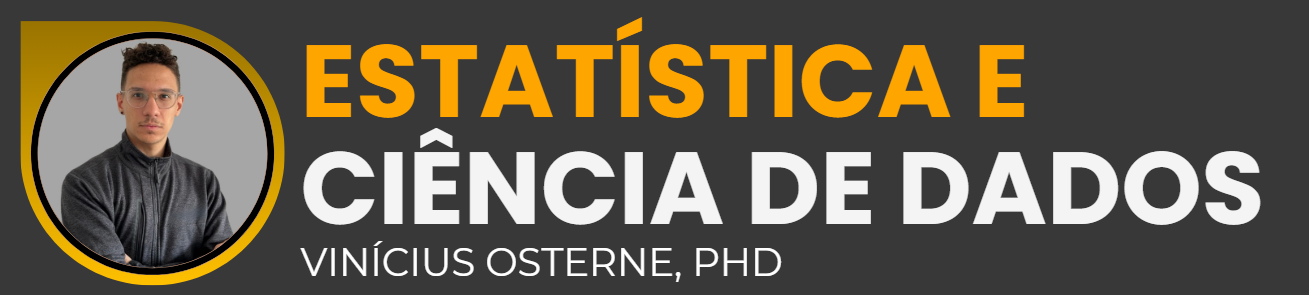

---

# Aprendizado Não Supervisionado - Métodos de Clustering (Agrupamento)

### Clusterização Hierárquica

---
<br><br><br><br><br>

# Introdução

- A **Clusterização Hierárquica** é um algoritmo de **aprendizado não supervisionado**, pertencente à categoria de **agrupamento (clustering)**.  
- Seu objetivo é **organizar as observações em uma hierarquia de grupos**, que podem ser representados por uma árvore chamada **dendrograma**.  
- Diferente do K-means, não é necessário definir o número de clusters inicialmente; podemos visualizar no dendrograma os possíveis agrupamentos em diferentes níveis.  
- Na prática, a clusterização hierárquica é útil para entender a **estrutura aninhada** dos dados e identificar **semelhanças em múltiplas escalas**.  

### Quando usar
- Descobrir **relações hierárquicas** ou estruturas em diferentes níveis de granularidade.  
- **Biologia e Genômica**: análise filogenética (árvores de espécies).  
- **Ciências Sociais**: agrupamento de indivíduos com base em múltiplos critérios.  
- **Marketing**: segmentação de clientes em grupos e subgrupos.  

### Condições implícitas
- Sensível à **escala das variáveis** (padronização é recomendada).  
- Pode ser influenciado por **outliers**, que alteram distâncias.  
- O método de **ligação (linkage)** escolhido impacta diretamente nos resultados.  

> ⚠️ **Atenção**: clusterização hierárquica não é ideal para bases **muito grandes** (alto custo computacional). É mais usada em amostras médias/pequenas.  

<br><br><br>


# Estrutura do Modelo

### Ideia central
- A clusterização hierárquica não otimiza uma função global única, mas **constrói uma árvore de similaridades**.  
- Cada observação começa como um cluster individual e, passo a passo, os clusters mais próximos são unidos (método **aglomerativo**).  
- Alternativamente, pode-se começar com todos os pontos em um só grupo e dividir sucessivamente (**divisivo**).  

### Medidas de distância entre clusters (linkage)
- **Single Linkage**: distância mínima entre pontos de dois clusters.  
- **Complete Linkage**: distância máxima entre pontos de dois clusters.  
- **Average Linkage**: distância média entre pontos dos clusters.  
- **Ward’s Method**: une clusters minimizando o aumento da variabilidade intra-cluster.  

<br><br><br>


# Algoritmo Aglomerativo (passo a passo)

1. **Começar** com cada ponto em seu próprio cluster.  
2. **Calcular** todas as distâncias entre pares de clusters.  
3. **Unir** os dois clusters mais próximos (de acordo com a métrica de linkage).  
4. **Recalcular** as distâncias entre o novo cluster e os demais.  
5. **Repetir** até que todos os pontos formem um único cluster (raiz do dendrograma).  

> 🔄 O resultado é um **dendrograma**, que pode ser “cortado” em diferentes níveis para escolher o número de grupos desejado.  

<br><br><br>


# Escolha do número de clusters

- Como a clusterização hierárquica não define $K$ a priori, o número de clusters é escolhido ao **“cortar” o dendrograma** em um certo nível.  

- Critérios práticos incluem:  
  - **Inspeção visual** do dendrograma (onde há maior salto nas distâncias).  
  - **Coeficiente de Cophenetic Correlation** (mede quão bem o dendrograma preserva as distâncias originais).  
  - **Silhouette Score** aplicado após escolher um corte.  

> 📌 Assim como no K-means, a escolha de $K$ deve considerar tanto métricas quantitativas quanto a **interpretação prática** dos grupos.  

<br><br><br>


# Aplicação
- Vamos ilustrar a **Clusterização Hierárquica Aglomerativa** utilizando uma aplicação em **dados reais** (Palmer Penguins).  
- Usaremos variáveis numéricas (comprimento do bico, profundidade do bico, comprimento da nadadeira e massa corporal).  
- Construiremos o dendrograma e mostraremos diferentes formas de cortar a árvore para definir os grupos.  


In [ ]:
# ## 1) Setup
# - Importar bibliotecas
# - Carregar dataset real (Palmer Penguins)

# %%
!pip -q install seaborn scikit-learn scipy

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score


In [ ]:
# ## 2) Carregar e explorar os dados
# Dataset: Palmer Penguins
# Variáveis:
# - bill_length_mm: comprimento do bico (mm)
# - bill_depth_mm: profundidade do bico (mm)
# - flipper_length_mm: comprimento da nadadeira (mm)
# - body_mass_g: massa corporal (g)

# %%
penguins = sns.load_dataset("penguins")
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

df = penguins[features].dropna()
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [ ]:
# ## 3) Padronização
# Distâncias euclidianas são sensíveis à escala ⇒ padronizar é essencial.

# %%
scaler = StandardScaler()
X = scaler.fit_transform(df)

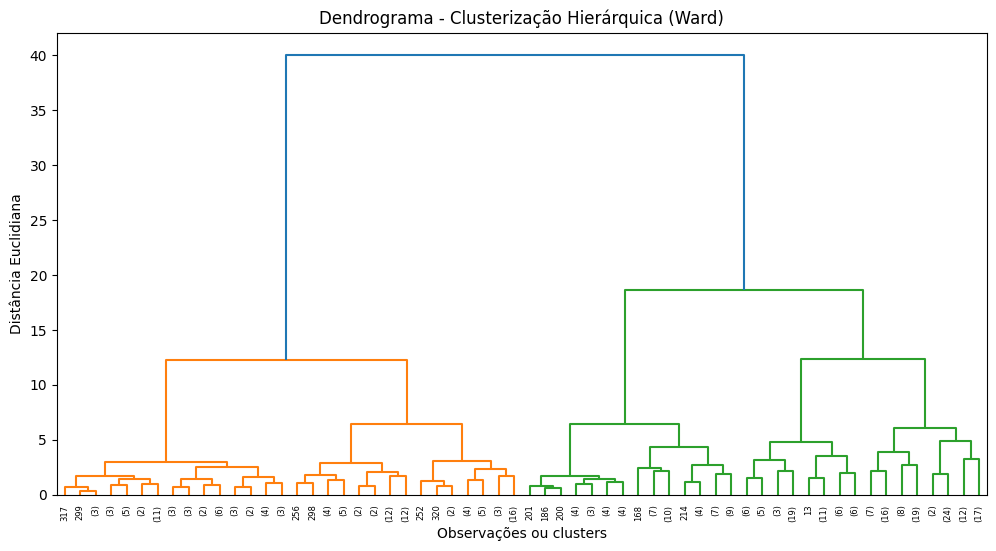

In [ ]:
# ## 4) Construção do Dendrograma
# Usaremos "Ward linkage" (minimiza a variância intra-cluster).
# O dendrograma mostra como os clusters são formados hierarquicamente.

# %%
Z = linkage(X, method="ward")

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode="level", p=5)  # mostra até 5 níveis
plt.title("Dendrograma - Clusterização Hierárquica (Ward)")
plt.xlabel("Observações ou clusters")
plt.ylabel("Distância Euclidiana")
plt.show()

In [ ]:
# ## 5) Definição do número de clusters
# Podemos "cortar" o dendrograma em um nível escolhido.
# Aqui, escolhemos K=3 (coerente com as espécies reais).

# %%
k = 3
labels = fcluster(Z, k, criterion="maxclust")

df_clustered = df.copy()
df_clustered["cluster"] = labels
df_clustered.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.1,18.7,181.0,3750.0,3
1,39.5,17.4,186.0,3800.0,3
2,40.3,18.0,195.0,3250.0,3
4,36.7,19.3,193.0,3450.0,3
5,39.3,20.6,190.0,3650.0,3


In [ ]:
# ## 6) Avaliação por Silhouette
# Mede a qualidade dos clusters obtidos (coesão vs separação).

# %%
score = silhouette_score(X, labels)
print(f"Silhouette Score (K={k}): {score:.3f}")

Silhouette Score (K=3): 0.454


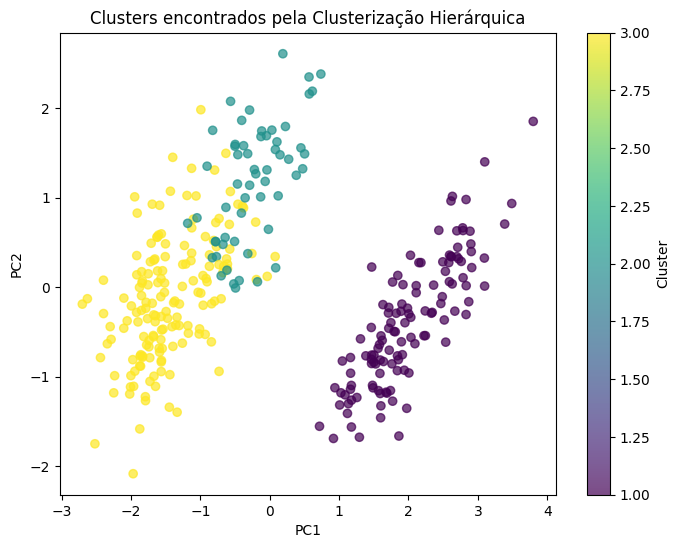

In [ ]:
# ## 7) Visualização 2D via PCA
# Reduzimos para 2 dimensões apenas para visualizar os clusters.

# %%
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters encontrados pela Clusterização Hierárquica")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# ## 8) Perfil dos clusters
# Analisamos as médias de cada variável para interpretar cada grupo.

# %%
df_clustered.groupby("cluster").mean().round(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
1,47.5,15.0,217.2,5076.0
2,49.8,18.6,197.1,3810.1
3,39.2,18.3,189.9,3675.8


In [ ]:
# ## 9) Comparação com K-means
# Vamos rodar K-means com o mesmo número de clusters (K=3)
# e comparar os perfis médios obtidos com os da clusterização hierárquica.

# %%
from sklearn.cluster import KMeans

# Treinar K-means
kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
labels_km = kmeans.fit_predict(X)

df_kmeans = df.copy()
df_kmeans["cluster"] = labels_km

print("=== Perfil dos clusters - Hierárquico ===")
display(df_clustered.groupby("cluster").mean().round(1))

print("\n=== Perfil dos clusters - K-means ===")
display(df_kmeans.groupby("cluster").mean().round(1))


=== Perfil dos clusters - Hierárquico ===


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
1,47.5,15.0,217.2,5076.0
2,49.8,18.6,197.1,3810.1
3,39.2,18.3,189.9,3675.8



=== Perfil dos clusters - K-means ===


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,47.5,18.8,196.9,3902.0
1,47.5,15.0,217.2,5076.0
2,38.2,18.1,188.4,3584.7
